In [98]:
!pip install kagglehub
!pip install japanize_matplotlib
!pip install seaborn
import kagglehub
import japanize_matplotlib  #日本語を使用しても文字化けしないようにできる
import seaborn as sns
import numpy as np

# Download latest version
path = kagglehub.dataset_download("rathoddharmendra/post-college-salaries")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Path to dataset files: /Users/shimizushota/.cache/kagglehub/datasets/rathoddharmendra/post-college-salaries/versions/1


In [106]:
import pandas as pd
data = pd.read_csv('/Users/shimizushota/Downloads/archive/final-post-college-salaries.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.rename(columns= {'Early Career Pay':'Early Career Pay ($)', 'Mid-Career Pay': 'Mid-Career Pay ($)'}, inplace = True) #regexは正規表現のこと
data['Early Career Pay ($)'] = data['Early Career Pay ($)'].astype(str).str.replace('$', '', regex = False)　#str.replaceは一部分が一致していればその部分を置き換える
data['Early Career Pay ($)'] = data['Early Career Pay ($)'].str.replace(',', '', regex = False)　　#replaceは完全一致していれば置き換える
data['Mid-Career Pay ($)'] = data['Mid-Career Pay ($)'].astype(str).str.replace('$', '' , regex = False)
data['Mid-Career Pay ($)'] = data['Mid-Career Pay ($)'].str.replace(',', '' , regex = False)
data['Early Career Pay ($)'] = data['Early Career Pay ($)'].astype(int)
data['Mid-Career Pay ($)'] = data['Mid-Career Pay ($)'].astype(int)
data['% High Meaning'] = data['% High Meaning'].str.replace('%', '', regex = False) 
data['% High Meaning'] = data['% High Meaning'].replace('-', np.nan, regex = False)　#np.nanは欠損値を表す
print(data['Early Career Pay ($)'].max())
print(data['Early Career Pay ($)'].min())
print(data['Mid-Career Pay ($)'].max())
print(data['Mid-Career Pay ($)'].min())
data

128500
39600
212100
46600


,Rank,Major,Degree Type,Early Career Pay ($),Mid-Career Pay ($),% High Meaning
0,1,Petroleum Engineering,Bachelors,98100,212100,60
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,21
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,128500,192300,45
3,4,Interaction Design,Bachelors,77400,178800,55
4,5,Building Science,Bachelors,71100,172400,46
5,6,Applied Economics and Management,Bachelors,81200,169300,47
6,7,Actuarial Mathematics,Bachelors,71200,167500,48
7,8,Optical Science & Engineering,Bachelors,81500,166400,73
8,9,Quantitative Economics,Bachelors,78400,165100,43
9,10,Operations Research,Bachelors,94900,164900,56


58900.0
61681.52031454784


<Axes: >

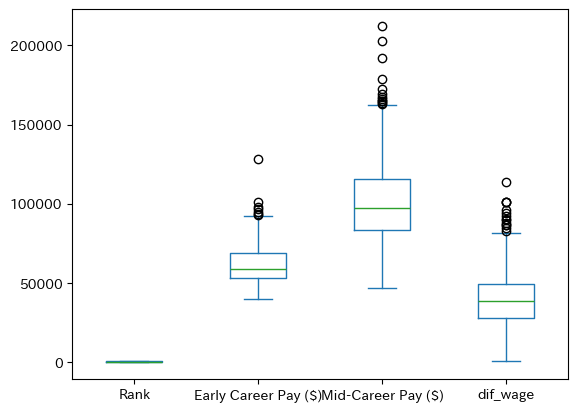

In [21]:
print(data['Early Career Pay ($)'].median())　
print(data['Early Career Pay ($)'].mean())
data.plot.box() #箱ひげ図

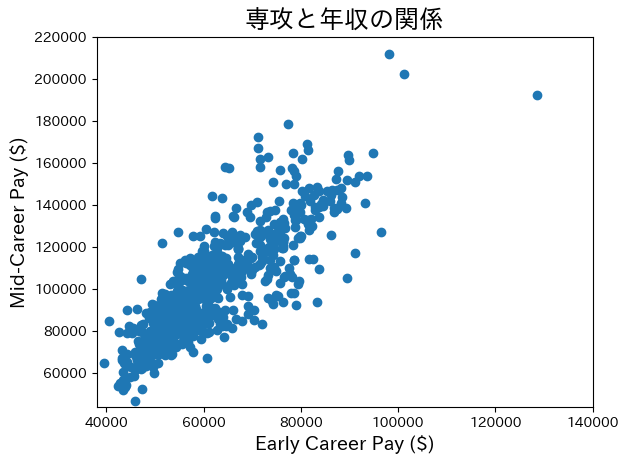

In [44]:
import matplotlib.pyplot as plt
plt.xlim(38000, 140000)
plt.ylim(44000, 220000)
plt.scatter(x = data['Early Career Pay ($)'], y = data['Mid-Career Pay ($)'])
plt.title('専攻と年収の関係', fontsize = 18)
plt.xlabel('Early Career Pay ($)', fontsize = 14)
plt.ylabel('Mid-Career Pay ($)', fontsize = 14)
plt.show()

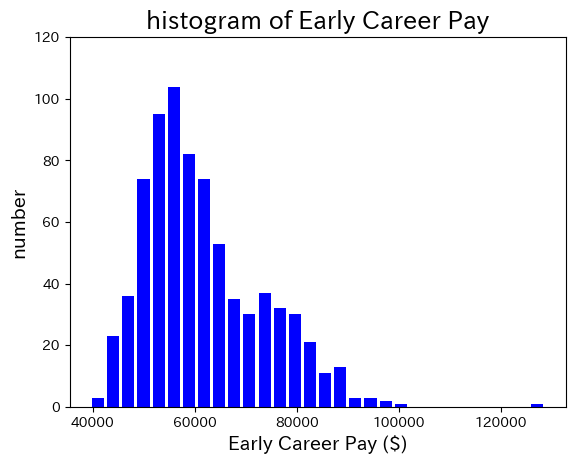

In [40]:
# binsで階級数を設定することができる、histtypeはヒストグラムの表示方法を選択、rwidthは棒の横幅を設定
a = data['Early Career Pay ($)']
b = data['Mid-Career Pay ($)']
plt.hist(a, bins = 30, histtype = 'bar', rwidth = 0.8, color = 'blue' )
plt.title('histogram of Early Career Pay', fontsize = 18)
plt.xlabel('Early Career Pay ($)', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.ylim(0,120)
plt.show()

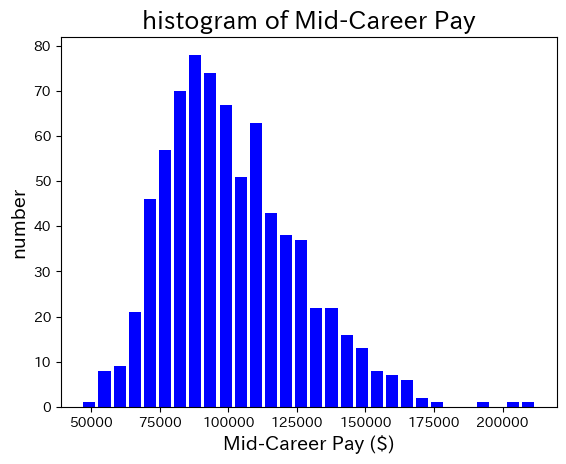

In [43]:
plt.hist(b, bins = 30, histtype = 'bar', rwidth = 0.8, color = 'blue')
plt.title('histogram of Mid-Career Pay', fontsize = 18)
plt.xlabel('Mid-Career Pay ($)', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.show()

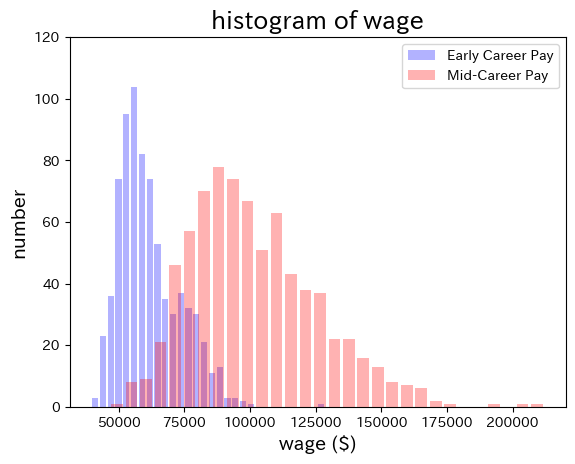

In [52]:
#ヒストグラムを重ねる
plt.hist(a, bins = 30, histtype = 'bar', rwidth = 0.8, alpha = 0.3, color = 'blue', label = 'Early Career Pay' )
plt.hist(b, bins = 30, histtype = 'bar', rwidth = 0.8, alpha = 0.3, color = 'red', label = 'Mid-Career Pay')
plt.title('histogram of wage', fontsize = 18)
plt.xlabel('wage ($)', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.ylim(0, 120)
plt.legend()
plt.show()

In [ ]:
data['dif_wage'] = data['Mid-Career Pay ($)']- data['Early Career Pay ($)']
data

In [10]:
# デフォルトは昇順なので降順にする場合は 'ascending = False'を実行する
# データフレームを並び替えるときはsort_valuesを使用する
data.sort_values('dif_wage',ascending = False)

,Rank,Major,Degree Type,Early Career Pay ($),Mid-Career Pay ($),% High Meaning,dif_wage
0,1,Petroleum Engineering,Bachelors,98100,212100,60%,114000
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,21%,101400
3,4,Interaction Design,Bachelors,77400,178800,55%,101400
4,5,Building Science,Bachelors,71100,172400,46%,101300
6,7,Actuarial Mathematics,Bachelors,71200,167500,48%,96300
15,16,Aerospace Studies,Bachelors,64500,158400,-,93900
18,19,Foreign Affairs,Bachelors,65200,157700,32%,92500
12,13,Public Accounting,Bachelors,71500,162200,47%,90700
11,12,Information & Computer Science,Bachelors,73200,162900,65%,89700
5,6,Applied Economics and Management,Bachelors,81200,169300,47%,88100


In [14]:
#ランクが100以下を抽出
data100 = data[data['Rank']<= 100]
print(data100['Early Career Pay ($)'].min())
print(data100['Early Career Pay ($)'].max())
print(data100['Mid-Career Pay ($)'].min())
print(data100['Mid-Career Pay ($)'].max())

61700
128500
129700
212100


In [13]:
data100.sort_values('dif_wage',ascending = False)

,Rank,Major,Degree Type,Early Career Pay ($),Mid-Career Pay ($),% High Meaning,dif_wage
0,1,Petroleum Engineering,Bachelors,98100,212100,60%,114000
1,2,Operations Research & Industrial Engineering,Bachelors,101200,202600,21%,101400
3,4,Interaction Design,Bachelors,77400,178800,55%,101400
4,5,Building Science,Bachelors,71100,172400,46%,101300
6,7,Actuarial Mathematics,Bachelors,71200,167500,48%,96300
15,16,Aerospace Studies,Bachelors,64500,158400,-,93900
18,19,Foreign Affairs,Bachelors,65200,157700,32%,92500
12,13,Public Accounting,Bachelors,71500,162200,47%,90700
11,12,Information & Computer Science,Bachelors,73200,162900,65%,89700
5,6,Applied Economics and Management,Bachelors,81200,169300,47%,88100


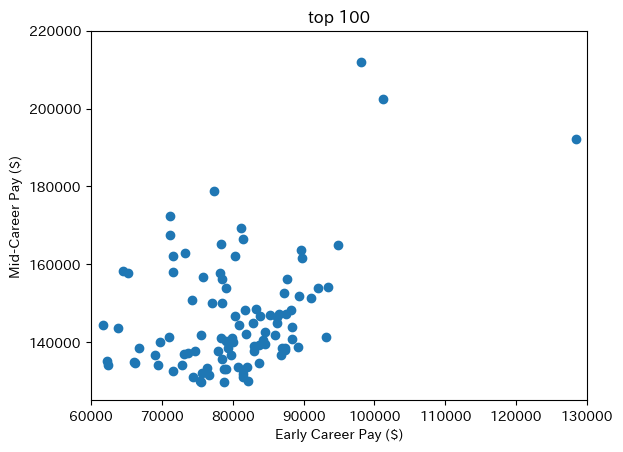

In [16]:
x = data100['Early Career Pay ($)']
y = data100['Mid-Career Pay ($)']
plt.scatter(x, y)
plt.title('top 100')
plt.xlabel('Early Career Pay ($)')
plt.ylabel('Mid-Career Pay ($)')
plt.xlim(60000, 130000)
plt.ylim(125000, 220000)
plt.show()

In [56]:
print(data[data['Rank']<= 10])
print(data.sort_values('Mid-Career Pay ($)')[:10]) #sort_valueはデフォルトが昇順なので上から10個のデータを取り出している

   Rank                                             Major Degree Type  \
0     1                             Petroleum Engineering   Bachelors   
1     2      Operations Research & Industrial Engineering   Bachelors   
2     3  Electrical Engineering & Computer Science (EECS)   Bachelors   
3     4                                Interaction Design   Bachelors   
4     5                                  Building Science   Bachelors   
5     6                  Applied Economics and Management   Bachelors   
6     7                             Actuarial Mathematics   Bachelors   
7     8                     Optical Science & Engineering   Bachelors   
8     9                            Quantitative Economics   Bachelors   
9    10                               Operations Research   Bachelors   

   Early Career Pay ($)  Mid-Career Pay ($) % High Meaning  dif_wage  
0                 98100              212100            60%    114000  
1                101200              202600           

corr_value = -0.12726868254670495


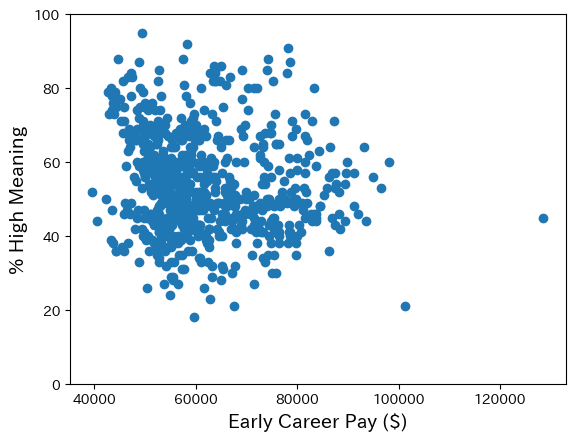

In [118]:
#相関分析 corr デフォルトはピアソンの積率相関係数
corr_value1 = data['Early Career Pay ($)'].corr(data['% High Meaning'])
print( f'corr_value = {corr_value1}')
data['% High Meaning'] = data['% High Meaning'].astype(float) #元々のデータタイプがfloatではなかったため、散布図を書くことができなかった
plt.scatter(data['Early Career Pay ($)'], data['% High Meaning'])
plt.xlabel('Early Career Pay ($)', fontsize = 14)
plt.ylabel('% High Meaning', fontsize = 14)
plt.ylim(0,100)
plt.show()

corr_value = -0.261912410193622


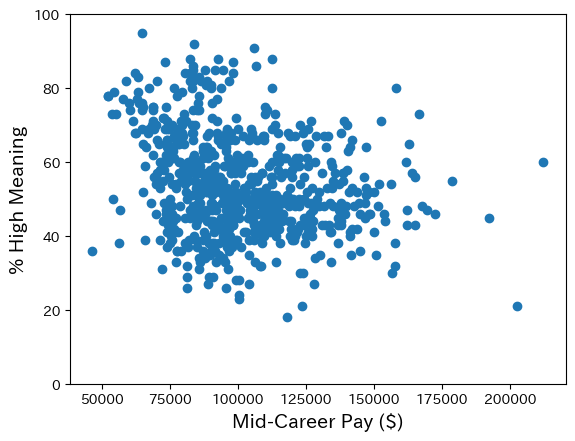

In [119]:
corr_value2 = data['Mid-Career Pay ($)'].corr(data['% High Meaning'])
print(f'corr_value = {corr_value2}')
data['% High Meaning'] = data['% High Meaning'].astype(float) #元々のデータタイプがfloatではなかったため、散布図を書くことができなかった
plt.scatter(data['Mid-Career Pay ($)'], data['% High Meaning'])
plt.xlabel('Mid-Career Pay ($)', fontsize = 14)
plt.ylabel('% High Meaning', fontsize = 14)
plt.ylim(0,100)
plt.show()